<a href="https://colab.research.google.com/github/pandaJam/learn-TF_DL-fundamentals-in-Python/blob/master/Multiclass_classification_with_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is for multi-class classification.
https://www.tensorflow.org/datasets/catalog/overview
* Contains many datasets suited for different domains

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# data already sorted into train and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data() #tuples

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# show 1st training e.g.
print(f"Training sample : \n {train_data[0]}\n")
print(f"Training label : \n {train_labels[0]}\n")


Training sample : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

* Matrix varying between 0 to 255.
* 10 different classes

In [4]:
train_data[0].shape

(28, 28)

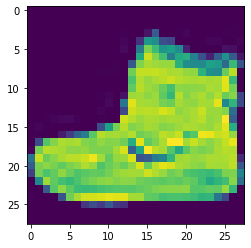

In [5]:
plt.imshow(train_data[0])

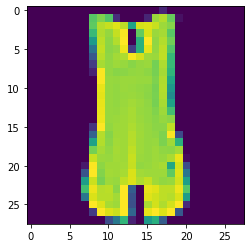

In [6]:
plt.imshow(train_data[4])

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

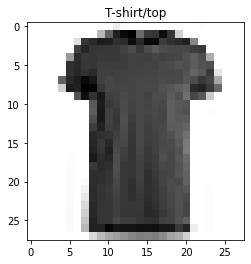

In [8]:
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

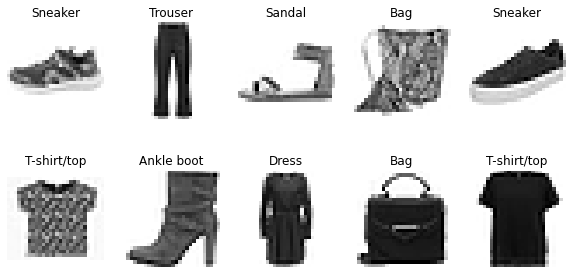

In [9]:
# plot multiple random images 
import random
plt.figure(figsize = (10,5))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  rand_idx = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_idx], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_idx]])
  plt.axis(False)

# **Building a multi-class classification model**

* Inp shape = 28 x 28 ( the shape of 1 image)
* Output shape = 10 ( one per class of clothing)
* loss fn = Categorical cross entropy
* Output layer activation = softmax (not sigmoid)
* If labels are one-hot encoded, use Categorical cross entropy
* If integers, use Sparse categorical cross entropy.


In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([ tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(10,activation = 'softmax')
                              ])
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history = model_1.fit(train_data,train_labels, epochs = 10, validation_data = (test_data,test_labels))



Epoch 1/10


ValueError: ignored

Our data needs to be flattened from 28 * 28 to (None, 784) - one long vector. Some layers can flatten the data automatically.


In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(10,activation = 'softmax')
                              ])
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history = model_1.fit(train_data,train_labels, epochs = 10, validation_data = (test_data,test_labels))

Epoch 1/10


ValueError: ignored

* Categorical cross entropy loss fn expect labels to be provided in a one_hot representation. 
* If labels are integers, use SparseCategoricalCrossentropy loss.

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(10,activation = 'softmax')
                              ])
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history = model_1.fit(train_data,train_labels, epochs = 10, validation_data = (test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [13]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(10,activation = 'softmax')
                              ])
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
non_norm_history = model_1.fit(train_data,
                      tf.one_hot(train_labels, depth = 10),
                      epochs = 10, validation_data = (test_data,tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

* Model is getiing an accuracy score of 0.35.
* Better than guessing
* Accuracy if the model is guessing is  100/10(no.of classes) = 10

In [14]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# **Normalizing data**

In [15]:
train_data.min(), train_data.max()

(0, 255)

In [16]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(10,activation = 'softmax')
                              ])
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
norm_history = model_2.fit(train_data_norm,
                      tf.one_hot(train_labels, depth = 10),
                      epochs = 10, validation_data = (test_data_norm,tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

You can see the model performance improved drastically when compared to data without normalization.


In [18]:
history = model_2.fit(train_data_norm,
                      tf.one_hot(train_labels, depth = 10),
                      epochs = 10, validation_data = (test_data_norm,tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5315 - accuracy: 0.8121 - val_loss: 0.5729 - val_accuracy: 0.8010
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5292 - accuracy: 0.8139 - val_loss: 0.5907 - val_accuracy: 0.7943
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5256 - accuracy: 0.8143 - val_loss: 0.5787 - val_accuracy: 0.7951
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5238 - accuracy: 0.8156 - val_loss: 0.5804 - val_accuracy: 0.7974
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5229 - accuracy: 0.8148 - val_loss: 0.5810 - val_accuracy: 0.8005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5203 - accuracy: 0.8163 - val_loss: 0.5667 - val_accuracy: 0.8022
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5201 - accuracy: 0.8158 - val_loss: 0.5923 - val_accuracy:

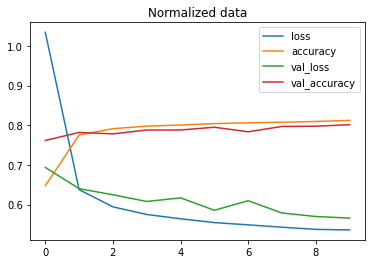

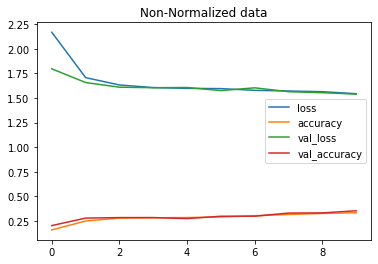

In [19]:
pd.DataFrame(norm_history.history).plot(title = "Normalized data")
pd.DataFrame(non_norm_history.history).plot(title = "Non-Normalized data")

Normalized data converged very soon, started at very low and kept decreasing.
<br>
Non-normalized data started at a very high value and flattened out.

The same model with even slightly different data can produce dramatically different results. So when comparing models, it's iimportant to make sure you are comparing them on the **SAME** criteria.
*   same architecture but different data
*   same data but different architecture.
<br>Change one thing after another to see what improved the results.



# Finding the ideal learning rate

In [20]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape= (28,28)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')                                        
                               ])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 **(epoch/20))

history = model_3.fit(train_data_norm, train_labels, epochs = 40,
                      validation_data = (test_data_norm, test_labels),
                      callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

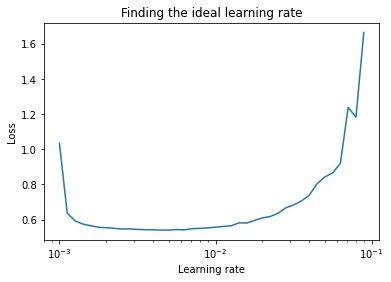

In [21]:
lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.show()

The ideal learning rate should be 10^-3 which is the default learning rate itself.

# Refitting model using the ideal learning rate

In [22]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape= (28,28)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')                                        
                               ])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_4.fit(train_data_norm, train_labels, 
                      epochs = 20,
                      validation_data = (test_data_norm, test_labels),
                      )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# Evaluating multi-class classification model



*   using classification metrics like confusion matrix
*   assess predictions using visualization
* improve results by training it for longer and changing architecture
* save and export it for use in an application


In [23]:
import itertools
from sklearn.metrics import confusion_matrix

figsize = (5, 5)

# Create the confusion matrix
def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax,shrink = 0.80)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [24]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
test_preds = model_4.predict(test_data_norm)
test_preds

array([[8.5629975e-11, 3.5361563e-13, 2.6633756e-05, ..., 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01],
       [3.4278555e-06, 1.2899265e-16, 9.5989150e-01, ..., 1.1383448e-28,
        6.3271809e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3866976e-08, ..., 7.3237463e-18,
        5.4811604e-08, 4.9225140e-14],
       ...,
       [7.8579560e-02, 2.2294882e-05, 1.4033400e-01, ..., 2.9533834e-20,
        1.1197206e-01, 4.7600297e-09],
       [3.3110991e-05, 9.9301308e-01, 2.3392199e-07, ..., 9.3986877e-15,
        8.1592771e-07, 1.2158881e-11],
       [7.9815983e-08, 7.7578166e-10, 1.6470600e-04, ..., 4.3826181e-02,
        1.5162564e-03, 3.9120454e-02]], dtype=float32)

The maximum prediction probability is the class which belongs to.

In [26]:
test_classes = test_preds.argmax(axis = 1)
test_classes, test_labels

(array([9, 2, 1, ..., 3, 1, 5]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

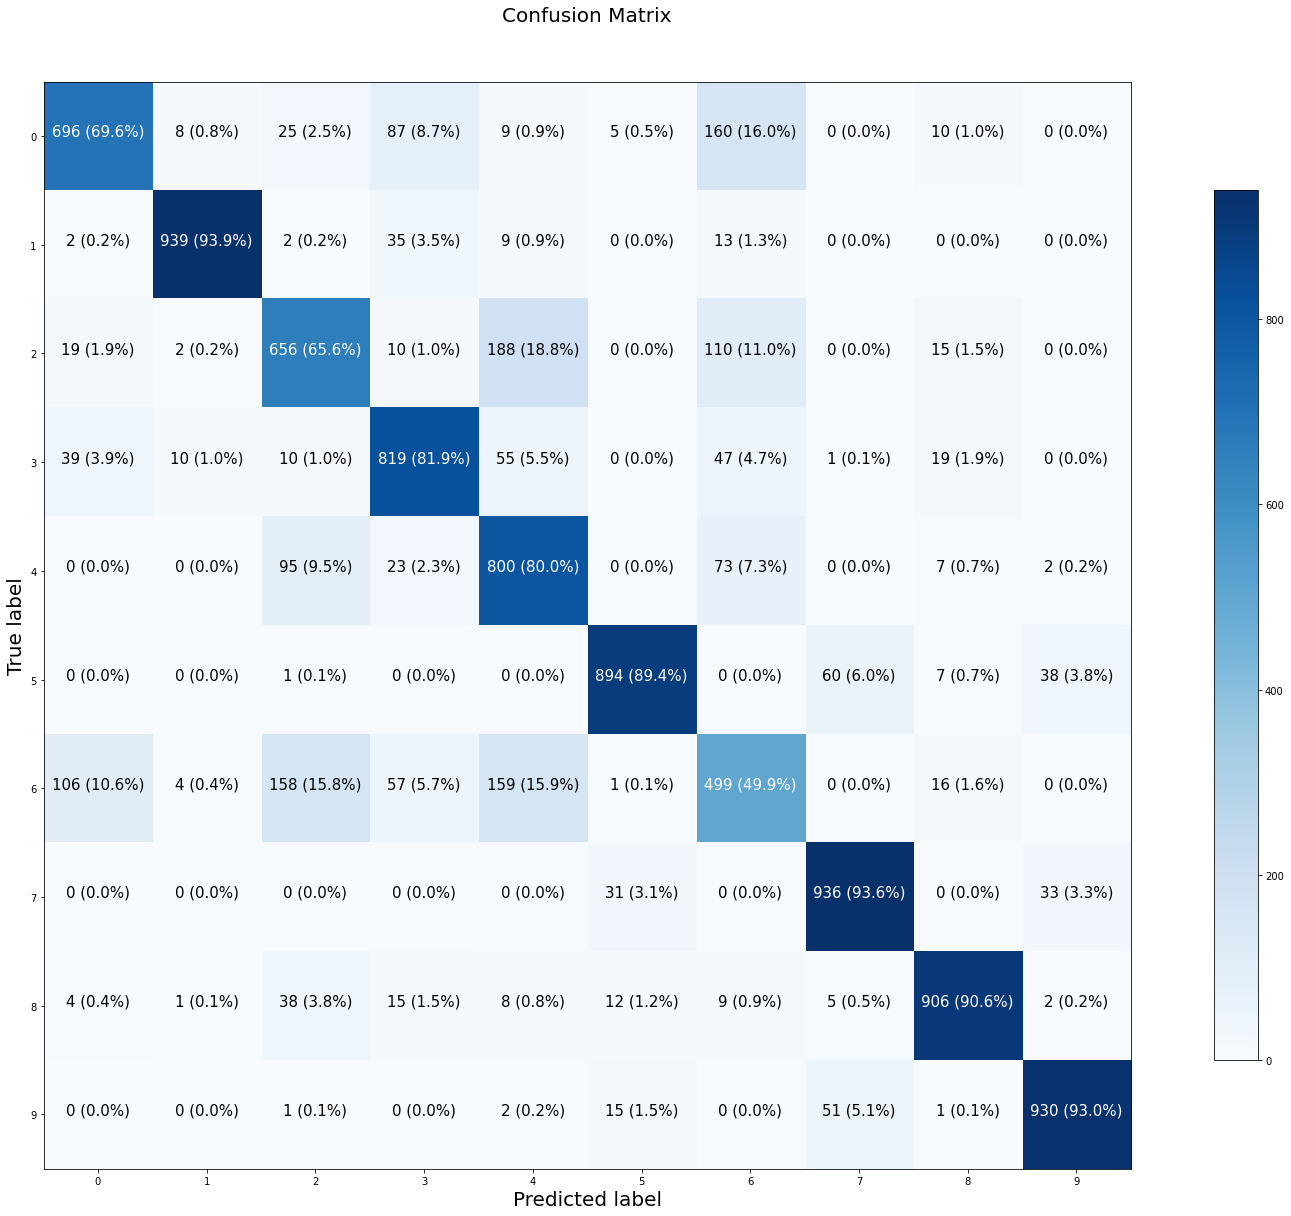

In [27]:
make_confusion_matrix(y_true = test_labels, 
                      y_pred = test_classes,
                      classes = class_names,
                      figsize = (30,20),
                      text_size = 20
                      )

* Darker the square, more accurate is the prediction.
* 1st row, 16% of the T shirts are misclassified as shirts.
* Pullover with coat
* Ankle boot with sneaker

Explore what is all been confused by the model and make use of this data to improve the model. Either we can consider incorporate t shirt data with shirt data or we need to provide more data for t shirts.


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = test_classes)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

# Visualise the predictions

In [43]:
def plot_random_image(model,images,true_labels,classes):
  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
      color = "red"
  
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


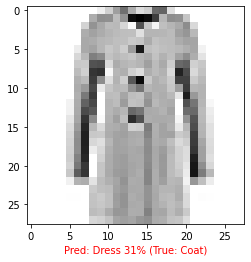

In [48]:
plot_random_image(model_4, images = test_data_norm, true_labels=test_labels, classes=class_names)

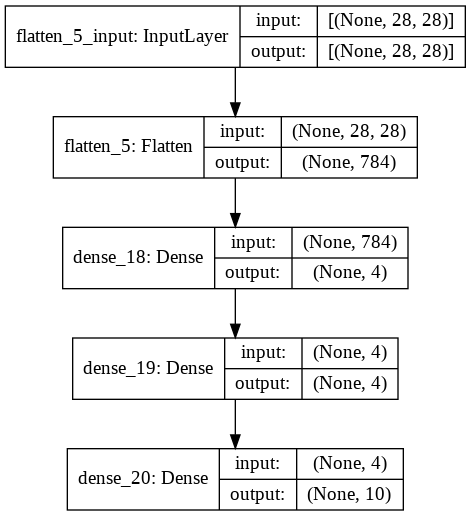

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [51]:
model_4.layers

In [54]:
wts ,bias = model_4.layers[1].get_weights()
wts, bias

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32),
 array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32))

In [55]:
wts.shape, bias.shape

((784, 4), (4,))

For every hidden unit, there is a bias vector
Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.